### **4. Ozempic**
- **Author**  : Sumashree Javaji
- **Datasets** :
    - medical_sample.csv - This dataset encapsulates the medical claims for services rendered to the specified patient group.
    - scripts_sample.csv - detailing the prescriptions dispensed to a fraction of the patients in the medical claims dataset
- **Dataset Description** : Prescription & patient journey
- **Problem Statement** : The goal is to Understand the Impact of Ozempic on Obese and Hypertensive Patients

#### **Data Exploration and Visualization**
- understanding the structure, identifying missing values, and summarizing key statistics
- Generate visualizations to understand the distribution of important variables, relationships
between different variables, and any other patterns or anomalies in the data such as peculiar
patterns or outliers

#### Importing necessary libraries 

In [1]:
### for data
import pandas as pd
import numpy as np

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

#### Importing os library to change my current working directory to a new folder created for homework 3

In [2]:
# Importing os library to change my current working directory to a new folder created for homework 2
import os
os.chdir('/Users/sumashreejavaji/PycharmProjects/BAX_452_Machine Learning/HW_4') # setting cwd to a new path
os.getcwd() # checking my environment's current working directory

# Loading the data
scripts_raw = pd.read_csv("longyear-obese-hypertensive-40-75-scripts-SMALL-sample.csv")
medical_raw = pd.read_csv("longyear-obese-hypertensive-40-57-medical-SMALL-sample.csv")

medical_raw.head()

/var/folders/3_/cs0bsxl53jj55bb_mt8gmp040000gn/T/ipykernel_5927/2728075797.py:7: DtypeWarning: Columns (9,10,29,43) have mixed types. Specify dtype option on import or set low_memory=False.
  scripts_raw = pd.read_csv("longyear-obese-hypertensive-40-75-scripts-SMALL-sample.csv")


,journey_id,episode_id,visit_id,encounter_id,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,place_of_service,...,diag_4,diag_5,rev_center_code,rev_center_units,proc_code,proc_modifier,proc_units,line_charge,claim_charge,smart_allowed
0,00006390c96ebfffed580074c35a16a7,d5e15811af1d772f54af52f3560be0a5,f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...,d5a7dc61071d977cef9ff762973d360f4bcf15a19790d9...,2020-07-13,CA,922.0,55.0,M,Home,...,NaN,NaN,NaN,1.0,A6549,NU,2.0,300.00,300.00,974.13
1,00006390c96ebfffed580074c35a16a7,d5e15811af1d772f54af52f3560be0a5,f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...,d5a7dc61071d977cef9ff762973d360f4bcf15a19790d9...,2020-07-13,CA,922.0,55.0,M,Home,...,NaN,NaN,NaN,1.0,A6549,NU,2.0,300.00,300.00,974.13
2,00006390c96ebfffed580074c35a16a7,e25e5285e4f66d35c9840bf4e040fe73,3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...,c60da949b58f0351c8781c062f65d92bce76d9532d1632...,2023-07-19,CA,922.0,60.0,M,Office,...,L03115,L03116,NaN,1.0,3074F,NaN,1.0,0.00,0.00,46.57
3,00006390c96ebfffed580074c35a16a7,e25e5285e4f66d35c9840bf4e040fe73,3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...,c60da949b58f0351c8781c062f65d92bce76d9532d1632...,2023-07-19,CA,922.0,60.0,M,Office,...,L03115,L03116,NaN,1.0,3078F,NaN,1.0,0.00,0.00,56.38
4,00006d564a4718c744f1bbf1b6c5f8c3,42ba4419d9ad7c9293d76686fb608f10,9e4534892128401c693a6ab2ea758cd6a0a6484972168b...,da5cef18317c14180ed561a84001d8a033d724d541a2c0...,2023-08-11,CA,900.0,55.0,F,Independent Laboratory,...,NaN,NaN,NaN,1.0,80053,NaN,1.0,88.07,88.07,15.16


In [3]:
scripts_raw.head()

,journey_id,cohort_id,claim_id,patient_gender,patient_state,patient_zip,patient_dob,pharmacy_npi,pharmacist_npi,prescriber_npi,...,bin,plan_pay,reject_code_1,reject_code_3,reject_code_4,reject_code_5,ndc,active,start_date,end_date
0,00006390c96ebfffed580074c35a16a7,16,60618bd8d37311da702bf9349e76f8c26d515c082e136f...,M,CA,922.0,1961-01-01,1.215361e+09,NaN,1750479168,...,22659.0,NaN,NaN,NaN,NaN,NaN,47335067381,True,190001,NaN
1,00006390c96ebfffed580074c35a16a7,16,dbeb47defd161331e43f4e359e8d43e4ef7546ff58359b...,M,CA,922.0,1961-01-01,1.215361e+09,NaN,1750479168,...,22659.0,NaN,NaN,NaN,NaN,NaN,47335067381,True,190001,NaN
2,00006390c96ebfffed580074c35a16a7,16,02927d081fad10afffcba79bad27f94ff52c98e968aaec...,M,CA,922.0,1961-01-01,1.215361e+09,NaN,1750479168,...,22659.0,NaN,NaN,NaN,NaN,NaN,47335067381,True,190001,NaN
3,00006390c96ebfffed580074c35a16a7,16,a412c986e2503a5140ed1482e88b5ec50feeedaf2d89ec...,M,CA,922.0,1961-01-01,1.215361e+09,NaN,1750479168,...,22659.0,NaN,NaN,NaN,NaN,NaN,47335067381,True,190001,NaN
4,00006390c96ebfffed580074c35a16a7,16,b65634edd78998753fe9606b142b2fff7765d6c576973c...,M,CA,922.0,1961-01-01,1.215361e+09,NaN,1750479168,...,22659.0,NaN,NaN,NaN,NaN,NaN,65862059805,True,190001,NaN


In [4]:
medical_raw.shape

(623525, 34)

In [5]:
# !pip install pandasql
from pandasql import sqldf

query = """
SELECT *
FROM medical_raw
WHERE journey_id = '00006390c96ebfffed580074c35a16a7'
"""

print(sqldf(query))

# !pip install openpyxl
import openpyxl
sqldf(query).to_excel('data_analysis.xlsx', index=False)

# upon analysis the results of the above sample query, I've found that the data has duplicate records.

                         journey_id                        episode_id  \
0  00006390c96ebfffed580074c35a16a7  d5e15811af1d772f54af52f3560be0a5   
1  00006390c96ebfffed580074c35a16a7  d5e15811af1d772f54af52f3560be0a5   
2  00006390c96ebfffed580074c35a16a7  e25e5285e4f66d35c9840bf4e040fe73   
3  00006390c96ebfffed580074c35a16a7  e25e5285e4f66d35c9840bf4e040fe73   

                                            visit_id  \
0  f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...   
1  f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...   
2  3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...   
3  3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...   

                                        encounter_id  claim_date  \
0  d5a7dc61071d977cef9ff762973d360f4bcf15a19790d9...  2020-07-13   
1  d5a7dc61071d977cef9ff762973d360f4bcf15a19790d9...  2020-07-13   
2  c60da949b58f0351c8781c062f65d92bce76d9532d1632...  2023-07-19   
3  c60da949b58f0351c8781c062f65d92bce76d9532d1632...  2023-07-19   

  patient_st

In [6]:
# Medical Dataset 
medical_df = medical_raw.copy()
medical_df.drop_duplicates(inplace=True)

# Calculate the number of dropped rows
num_dropped = len(medical_raw) - len(medical_df)
print(f'Number of dropped rows: {num_dropped}')
print(f'Percentage of dropped rows: {round((num_dropped/len(medical_raw))*100,2)}% \n')

# Scripts Dataset 
scripts_df = scripts_raw.copy()
scripts_df.drop_duplicates(inplace=True)

# Calculate the number of dropped rows
n_dropped = len(scripts_raw) - len(scripts_df)
print(f'Number of dropped rows: {n_dropped}')
print(f'Percentage of dropped rows: {round((n_dropped/len(scripts_raw))*100,2)}%')

Number of dropped rows: 60323
Percentage of dropped rows: 9.67% 

Number of dropped rows: 1233
Percentage of dropped rows: 0.14%


#### Level of Dataset 
- check the level of informain in the Dataset 
- Medical : journey_id ,  encounter_id , proc_code , proc_modifier  , rev_center_code

In [7]:
medical_df_lvl = medical_df.copy()
medical_df_lvl.drop_duplicates(inplace=True)
# medical_df_lvl.columns
medical_df_lvl.shape

(563202, 34)

In [8]:
# !pip install pandasql
from pandasql import sqldf

query = """
SELECT journey_id ,  encounter_id , proc_code , proc_modifier  , rev_center_code ,count(*) cnt
FROM medical_df_lvl
group by journey_id ,  encounter_id , proc_code , proc_modifier , rev_center_code
having cnt>1
order by cnt desc
"""
# , rev_center_units , line_charge

print(sqldf(query))


Empty DataFrame
Columns: [journey_id, encounter_id, proc_code, proc_modifier, rev_center_code, cnt]
Index: []


In [9]:
# to analyse the level of the dataset
query = """
SELECT *
FROM medical_raw
WHERE journey_id = '0c8820830b830715c4bb0dd9c2af6ac8' 
"""

sqldf(query).to_excel('medical_level.xlsx', index=False)

#### **Observations**
Original Dataset
- Medical : 623,525 rows & 34 columns  || duplicates = 9.67%  || 5 columns with > 50% missing values
- Scripts : 894,623 rows & 48 columns  || duplicates = 0.14%  || 19 columns with > 50% missing values

Modified Dataset (dopeed duplicate records)
- Medical : 563,202 rows 
- Scripts : 893,390 rows

Decisions & Reasons
- **Rev center code** = even though 81% missing values, it's useful in identifying the granularity of the dataset (unique for each line charge, i.e works as a unique line item identifier)
- **Diag_number** = The diagnoses list reflects the patient's condition and the reason for the visit or encounter determined by the healthcare provider based on their evaluation of the patient. therefore, a visit might have 1 or more diagnosis (minimum being 1); which in turn will have nulls for remaining diagnosis columns diag_2 , diag_3 , diag_4 & diag_5
    - Keeping the diag_4 & diag_5 even though they have 51 & 66% missing values; as a patient can have minimum 1 diagnosis. not all patients will have multiple diagnosis
- **Proc_modifier** = Since ozempic is a medication and not a procedure, it would not have a procedure modifier in the same way that a medical procedure would.
- **Missing values in HCP columns** - hcp_npi , hcp_taxonomy , hcp_specialty , hcp_npi_list
    - staff may inadvertently omit HCP taxonomy codes when submitting claims for reimbursement.
    - In some situations, HCP taxonomy codes may be considered sensitive information, and as a result, they may be excluded from billing data to protect the privacy of healthcare providers.
- join & get more info on proc_code & diagnosis
- **Ozempic Data** : records = 705 | proc_code == 'J3490'
- DOS - Z79.85 is a new code effective 10/1/22

In [10]:
print('Medical : There are',medical_raw.shape[0],'rows &',medical_raw.shape[1],'columns in the dataset')
print('Scripts : There are',scripts_raw.shape[0],'rows &',scripts_raw.shape[1],'columns in the dataset')

Medical : There are 623525 rows & 34 columns in the dataset
Scripts : There are 894623 rows & 48 columns in the dataset


In [11]:
print('Medical : There are',medical_df.shape[0],'rows &',medical_df.shape[1],'columns in the dataset')
print('Scripts : There are',scripts_df.shape[0],'rows &',scripts_df.shape[1],'columns in the dataset')

Medical : There are 563202 rows & 34 columns in the dataset
Scripts : There are 893390 rows & 48 columns in the dataset


In [12]:
medical_df.info() # To check Data types of each column , memory consumption of the dataset & count of non null records 

<class 'pandas.core.frame.DataFrame'>
Index: 563202 entries, 0 to 623524
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   journey_id         563202 non-null  object 
 1   episode_id         563202 non-null  object 
 2   visit_id           561496 non-null  object 
 3   encounter_id       563202 non-null  object 
 4   claim_date         563202 non-null  object 
 5   patient_state      563202 non-null  object 
 6   patient_short_zip  563189 non-null  float64
 7   patient_age        557352 non-null  float64
 8   patient_gender     563073 non-null  object 
 9   place_of_service   439462 non-null  object 
 10  visit_type         543032 non-null  object 
 11  payor              549688 non-null  object 
 12  payor_channel      528756 non-null  object 
 13  ref_npi            269303 non-null  float64
 14  hcp_npi            397159 non-null  float64
 15  hcp_taxonomy       391502 non-null  object 
 16  hcp_spe

In [13]:
scripts_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 893390 entries, 0 to 894622
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   journey_id                     893390 non-null  object 
 1   cohort_id                      893390 non-null  int64  
 2   claim_id                       893390 non-null  object 
 3   patient_gender                 893390 non-null  object 
 4   patient_state                  893390 non-null  object 
 5   patient_zip                    893268 non-null  float64
 6   patient_dob                    893386 non-null  object 
 7   pharmacy_npi                   838725 non-null  float64
 8   pharmacist_npi                 21578 non-null   float64
 9   prescriber_npi                 889922 non-null  object 
 10  primary_care_npi               3560 non-null    object 
 11  group_id                       272538 non-null  object 
 12  date_of_service                8933

In [14]:
# Checking for the null values in all the columns and printing only the columns with nulls ordered by desc null count 
null_info = pd.DataFrame({'Column': medical_df.isnull().sum().index, 'Null Count': medical_df.isnull().sum().values}).sort_values(by='Null Count' , ascending=False)
null_info['Null Percentage'] = (null_info['Null Count'] / len(medical_df)) * 100

# Display the result
print(null_info[null_info['Null Count'] > 0])

               Column  Null Count  Null Percentage
26    rev_center_code      460868        81.829965
29      proc_modifier      414649        73.623496
25             diag_5      376554        66.859493
13            ref_npi      293899        52.183586
24             diag_4      292415        51.920093
23             diag_3      232237        41.235116
15       hcp_taxonomy      171700        30.486397
16      hcp_specialty      171680        30.482846
18       hcp_npi_list      166043        29.481962
14            hcp_npi      166043        29.481962
22             diag_2      146615        26.032400
9    place_of_service      123740        21.970803
12      payor_channel       34446         6.116100
28          proc_code       21703         3.853502
10         visit_type       20170         3.581308
11              payor       13514         2.399494
7         patient_age        5850         1.038704
19       hco_npi_list        5277         0.936964
17            hco_npi        52

In [15]:
# Checking for the null values in all the columns and printing only the columns with nulls ordered by desc null count 
null_info_scripts = pd.DataFrame({'Column': scripts_df.isnull().sum().index, 'Null Count': scripts_df.isnull().sum().values}).sort_values(by='Null Count' , ascending=False)
null_info_scripts['Null Percentage'] = (null_info_scripts['Null Count'] / len(scripts_df)) * 100
# Display the result
print(null_info_scripts[null_info_scripts['Null Count'] > 0])

                           Column  Null Count  Null Percentage
33            coupon_value_amount      893385        99.999440
43                  reject_code_5      891873        99.830197
32                    coupon_type      891360        99.772776
10               primary_care_npi      889830        99.601518
42                  reject_code_4      886032        99.176396
30  prior_authorization_type_code      884491        99.003906
8                  pharmacist_npi      871812        97.584705
47                       end_date      861008        96.375379
41                  reject_code_3      852348        95.406038
17                 ndc11_original      799300        89.468205
20            diagnosis_code_type      781756        87.504449
19                 diagnosis_code      718924        80.471463
40                  reject_code_1      706605        79.092558
29                       daw_code      701282        78.496737
25               level_of_service      675443        75

In [16]:
missing_diag4 = """
SELECT *
FROM medical_df
WHERE journey_id = '00006390c96ebfffed580074c35a16a7'
"""
import openpyxl
sqldf(missing_diag4).to_excel('missing_diag4.xlsx', index=False)
# print(sqldf(missing_diag4))

In [17]:
missing_proc_modifier= """
SELECT *
FROM medical_df
WHERE proc_modifier is null
"""
import openpyxl
sqldf(missing_proc_modifier).to_excel('missing_proc_modifier.xlsx', index=False)
# print(sqldf(missing_diag4))

#### **Handling Missing Data**
- Since we will be training the model on predicting price, it would make sense to drop any null values in the price column
- Since car, latitude & longitude are not key columns, I'm imputing with 0 to differentiate these records from the other records in the dataset
- Imputing with Mean : buildng area , land size
- Imputing with Median : bathroom , bedroom & YearBuilt
- New Dataset has 391 record since we dropped the 108 NA's in Price column
- One-hot encoding : applying encoding on Regionname & Type columns

In [18]:
# dropping irrelavant columns from the dataset
# following columns are not very useful in context of assessing the efficiency of the ozempic on hyperintensive patients & they have >80% missing values
# therefore dropping these columns from the analysis

medical_df = medical_df.drop(columns=[ 'ref_npi']) 
scripts_df = scripts_df.drop(columns=['pharmacist_npi' , 'coupon_type' , 'coupon_value_amount'])

# Imputing Na with mean
medical_df['patient_age']= medical_df['patient_age'].fillna(medical_df['patient_age'].mean())

# Imputing Na with mode
mode_zip = medical_df.groupby('patient_state')['patient_short_zip'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)
# Update missing values in the 'zip' column with the mode for each state
medical_df['patient_short_zip'] = medical_df['patient_short_zip'].fillna(medical_df['patient_state'].map(mode_zip))

#handling NA's by replacing with 'UNKNOWN'
medical_df[['visit_id' , 'place_of_service'  , 'visit_type' , 'payor' , 'payor_channel' , 'hcp_taxonomy' , 'hcp_specialty' , 'hcp_npi_list' , 'hco_npi_list' , 'diag_list' , 'diag_1' , 'diag_2' , 'diag_3' , 'diag_4' , 'diag_5' , 'proc_code' , 'proc_modifier' , 'rev_center_code']] = medical_df[['visit_id' , 'place_of_service' , 'visit_type' , 'payor' , 'payor_channel' , 'hcp_taxonomy' , 'hcp_specialty' , 'hcp_npi_list' , 'hco_npi_list' , 'diag_list' , 'diag_1' , 'diag_2' , 'diag_3' , 'diag_4' , 'diag_5' , 'proc_code' , 'proc_modifier', 'rev_center_code']].fillna('UNKNOWN')
medical_df['hcp_npi'] = medical_df['hcp_npi'].astype(str).fillna('UNKNOWN')
medical_df['hco_npi'] = medical_df['hco_npi'].astype(str).fillna('UNKNOWN')

In [19]:
## PROCEDURE CODE
unique_proc_code = medical_df['proc_code'].unique()
unique_proc_code_count =  medical_df['proc_code'].nunique()

# Extract unique 'proc_code' values that start with 'J'
unique_proc_code_J = medical_df[medical_df['proc_code'].str.startswith('J')]['proc_code'].unique()
unique_proc_code_count_J = medical_df[medical_df['proc_code'].str.startswith('J')]['proc_code'].nunique()

## DIAGNOSIS
unique_diag_1 = medical_df['diag_1'].unique()
unique_diag_1_count =  medical_df['diag_1'].nunique()

# Extract unique 'proc_code' values that start with 'J'
unique_diag_1_z = medical_df[medical_df['diag_1'].str.startswith('Z')]['diag_1'].unique()
unique_diag_1_count_z = medical_df[medical_df['diag_1'].str.startswith('Z')]['diag_1'].nunique()

print(unique_diag_1_count_z , unique_proc_code_count_J)


572 325


In [20]:
proc_code_ozempic = """
SELECT *
FROM medical_df
WHERE proc_code == 'J3490'
"""
ozempic_medical_df = sqldf(proc_code_ozempic)

# records = 705 | proc_code == 'J3490'
# records = 13333 | proc_code like 'J%' | unique proc codes starting with J = 325

In [21]:
# Checking missing values post imputation/handling
null_info = pd.DataFrame({'Column': ozempic_medical_df.isnull().sum().index, 'Null Count': ozempic_medical_df.isnull().sum().values}).sort_values(by='Null Count' , ascending=False)
print(null_info[null_info['Null Count'] > 0])

Empty DataFrame
Columns: [Column, Null Count]
Index: []


In [22]:
# Z79.85 is the code given to - "Lng trm (crnt) use injectable non-insulin antidiabetic drugs" (which includes ozzempic)
#2024 edition of Z79.85 became effective on October 1, 2023, this could be the reasons as to why we aren't finding this code in our data as our data is until september 2023
unique_diag_1_Z = medical_df.loc[medical_df['diag_1'].str.startswith('Z798'), 'diag_1'].unique()
unique_diag_1_Z_counts = medical_df.loc[medical_df['diag_1'].isin(unique_diag_1_Z), 'diag_1'].value_counts().to_frame(name='count')
print(unique_diag_1_Z_counts)

        count
diag_1       
Z79899   1679
Z79891    675
Z79890     27
Z7984      17
Z7982      15
Z79810      4
Z79811      2


In [23]:
# E66.01 is primary as per CMS - Morbid (severe) obesity due to excess calories
unique_diag_1_E = medical_df.loc[medical_df['diag_1'].str.startswith('E66'), 'diag_1'].unique()
unique_diag_1_E_counts = medical_df.loc[medical_df['diag_1'].isin(unique_diag_1_E), 'diag_1'].value_counts().to_frame(name='count')
print(unique_diag_1_E_counts)

        count
diag_1       
E6601    2775
E669     1765
E663      518
E6609     246
E662       73
E668       47
E661        9


In [24]:
# E66.01 is primary as per CMS - Morbid (severe) obesity due to excess calories
unique_diag_1_E = ozempic_medical_df.loc[ozempic_medical_df['diag_1'].str.startswith('E66'), 'diag_1'].unique()
unique_diag_1_E_counts = ozempic_medical_df.loc[ozempic_medical_df['diag_1'].isin(unique_diag_1_E), 'diag_1'].value_counts().to_frame(name='count')
print(unique_diag_1_E_counts)

        count
diag_1       
E669        1


##### Diagnosis codes for hypertension found in ozempic proc code are : ['I10', 'I119', 'I110', 'I120', 'I130', 'I159', 'I129', 'I160']

In [25]:
columns_of_interest = ['diag_1', 'diag_2', 'diag_3', 'diag_4']

# Concatenate the four columns and get the unique values
unique_values_hp = pd.concat([ozempic_medical_df[column].str.extract(r'^I1(\d+)')[0] for column in columns_of_interest]).unique()

# Create an empty list to store unique values
unique_values_combined_hp = []

for value in unique_values_hp:

    if pd.notna(value):
        # Append the value to the list, with 'I1' concatenated
        unique_values_combined_hp.append('I1' + str(value))

print(unique_values_combined_hp)

['I10', 'I119', 'I110', 'I120', 'I130', 'I159', 'I129', 'I160']


##### Diagnosis codes for obesity found in ozempic proc code are : ['E669', 'E6601', 'E662']

In [26]:
columns_of_interest = ['diag_1', 'diag_2', 'diag_3', 'diag_4']

# Concatenate the four columns and get the unique values
unique_values_ob = pd.concat([ozempic_medical_df[column].str.extract(r'^E66(\d+)')[0] for column in columns_of_interest]).unique()

# Create an empty list to store unique values
unique_values_combined_ob = []

for value in unique_values_ob:

    if pd.notna(value):
        # Append the value to the list, with 'E66' concatenated
        unique_values_combined_ob.append('E66' + str(value))

print(unique_values_combined_ob)


['E669', 'E6601', 'E662']


In [27]:
condition = ozempic_medical_df[['diag_1', 'diag_2', 'diag_3', 'diag_4']].isin(unique_values_combined_ob + unique_values_combined_hp).any(axis=1)

# Select the rows where any of the four columns has a value in the list
selected_rows = ozempic_medical_df[condition]

In [28]:
selected_rows.shape

(247, 33)

In [29]:
# I10	Essential (primary) hypertension as per CMS 
# 7.13% of the patients diagnosed with hypertension
len_df = len(medical_df)
unique_diag_1_E = medical_df.loc[medical_df['diag_1'].str.startswith('I1'), 'diag_1'].unique()
unique_diag_1_E_counts = medical_df.loc[medical_df['diag_1'].isin(unique_diag_1_E), 'diag_1'].value_counts().to_frame(name='count')
unique_diag_1_E_counts['count'] *= 100

# Calculate the percentage relative to the length of the entire DataFrame
unique_diag_1_E_counts['count'] /= len_df
print(round(unique_diag_1_E_counts,2))

        count
diag_1       
I10      7.13
I129     0.22
I119     0.21
I110     0.21
I130     0.12
I160     0.07
I1310    0.03
I120     0.03
I161     0.03
I132     0.03
I152     0.00
I169     0.00
I150     0.00
I1311    0.00
I151     0.00
I159     0.00
I158     0.00


In [30]:
## NDC CODES & TRANSACTION TYPE
unique_ndc11_code = scripts_df['ndc11'].unique()
unique_ndc11_code_count =  scripts_df['ndc11'].nunique()

unique_transaction_type_code = scripts_df['transaction_type'].unique()
unique_transaction_type_count =  scripts_df['transaction_type'].nunique()

print(unique_transaction_type_code)


['PAID' 'REJECTED' 'REVERSED']


In [31]:
# ozempic_scripts_df = scripts_df[scripts_df['ndc11'].isin([169413001,  169413013,  169413211,  169413212, 169413290,  169413297,  169413602,  169413611,  169418103,  169418113,  169418190,  169418197,  169477211,  169477212,  169477290,  169477297])]
ozempic_scripts_df = scripts_df[scripts_df['transaction_type'].isin(['PAID'])]
ozempic_scripts_df.head()

,journey_id,cohort_id,claim_id,patient_gender,patient_state,patient_zip,patient_dob,pharmacy_npi,prescriber_npi,primary_care_npi,...,bin,plan_pay,reject_code_1,reject_code_3,reject_code_4,reject_code_5,ndc,active,start_date,end_date
0,00006390c96ebfffed580074c35a16a7,16,60618bd8d37311da702bf9349e76f8c26d515c082e136f...,M,CA,922.0,1961-01-01,1.215361e+09,1750479168,NaN,...,22659.0,NaN,NaN,NaN,NaN,NaN,47335067381,True,190001,NaN
1,00006390c96ebfffed580074c35a16a7,16,dbeb47defd161331e43f4e359e8d43e4ef7546ff58359b...,M,CA,922.0,1961-01-01,1.215361e+09,1750479168,NaN,...,22659.0,NaN,NaN,NaN,NaN,NaN,47335067381,True,190001,NaN
2,00006390c96ebfffed580074c35a16a7,16,02927d081fad10afffcba79bad27f94ff52c98e968aaec...,M,CA,922.0,1961-01-01,1.215361e+09,1750479168,NaN,...,22659.0,NaN,NaN,NaN,NaN,NaN,47335067381,True,190001,NaN
3,00006390c96ebfffed580074c35a16a7,16,a412c986e2503a5140ed1482e88b5ec50feeedaf2d89ec...,M,CA,922.0,1961-01-01,1.215361e+09,1750479168,NaN,...,22659.0,NaN,NaN,NaN,NaN,NaN,47335067381,True,190001,NaN
4,00006390c96ebfffed580074c35a16a7,16,b65634edd78998753fe9606b142b2fff7765d6c576973c...,M,CA,922.0,1961-01-01,1.215361e+09,1750479168,NaN,...,22659.0,NaN,NaN,NaN,NaN,NaN,65862059805,True,190001,NaN


In [32]:
scripts_lvl = """
SELECT *
FROM ozempic_scripts_df
WHERE journey_id = '04acf247b3079de7b6bb76462da48423'
"""
# print(sqldf(query))

sqldf(scripts_lvl).to_excel('scripts_lvl.xlsx', index=False)


In [33]:
scripts_lvl = """
SELECT journey_id , claim_id ,date_authorized , count(*) cnt
FROM ozempic_scripts_df
group by journey_id ,  claim_id , date_authorized
having cnt>1
order by cnt desc
"""
sqldf(scripts_lvl)

,journey_id,claim_id,date_authorized,cnt
0,1dcf69cae91dd5d976b86d221535c362,f4acf67b651d13ccb399d80676b4cebbb9b1d270e303f8...,2022-11-18,4
1,019a5991eeffe87da1b05722d2fa4d47,6515ffb76cb4f74ad14ed4accf07497f52818c16fc54e6...,2022-12-30,3
2,01b3b99dd6b45372ad3822d788d67378,687a4f125d09a1d2a37182806558a59de5cc1bc6a0da74...,2023-03-15,3
3,01b3b99dd6b45372ad3822d788d67378,d01f73c9a8f2e6f5a1c5b2da11493e205a24c689b33719...,2023-03-15,3
4,0221b1d37da4f3c035b93094aa5529de,ba1d7bbe95dd5553380c6db3f2c8588c1084c1c983cc97...,2023-05-23,3
...,...,...,...,...
15718,1ff83a5bc630aaaf1d7609eebbcb1f56,814f11e460941e6bfba31a81108fc46ad2881237cc562d...,2023-01-03,2
15719,1ff83a5bc630aaaf1d7609eebbcb1f56,c78668eaf59cc9e1bcd6261cb9bdebf596549e27b3237b...,2023-04-28,2
15720,1ff83a5bc630aaaf1d7609eebbcb1f56,ddaf92a62278aac43085626e2779eb72d5f25b25e1ff1d...,2022-07-26,2
15721,1ff8fc83bf1796e9a601c6fdaaa5a3ef,7160df14584b3a1c32f57d8ce17b44d99bc103fcf3cbda...,2023-02-22,2


In [34]:
ozempic_scripts_df.shape

(614206, 45)

In [35]:
ozempic_medical_df.shape

(705, 33)

In [36]:
print(ozempic_medical_df[ozempic_medical_df['journey_id'].isin(ozempic_scripts_df['journey_id'])]['journey_id'].count())

389


In [37]:
scripts_lvl = """
SELECT m.journey_id , claim_id , date(claim_date) ,date_of_service ,date_authorized , date_prescription_written
FROM ozempic_medical_df m
left join ozempic_scripts_df s
on m.journey_id = s.journey_id
"""
sqldf(scripts_lvl).to_excel('merge_analysis.xlsx', index=False)

In [38]:
diagnosis_code_names_dict = {'N18.6':'Chronic kidney disease (CKD) stage 5'
,'Z51.11':'Encounter for antineoplastic chemotherapy'
,'R07.9':'Chest pain'
,'M54.16':'Radiculopathy, lumbar region'
,'E11.65':'Type 2 diabetes mellitus with hyperglycemia'
,'J20.9':'Acute bronchitis'
,'E11.9':'Type 2 diabetes mellitus without complications'
,'I10':'Essential (primary) hypertension'
,'I25.10':'Atherosclerotic heart disease of native coronary artery without angina pectoris'
,'F33.2':'Major depressive disorder, recurrent, moderate'
,'I25.2':'Old myocardial infarction'
,'M25.562':'Pain in left knee'
,'Z30.42':'Encounter for elective termination of pregnancy'
,'C61':'Malignant neoplasm of prostate'
,'R07.8':'Other chest pain'
,'M17.11':'Unilateral primary osteoarthritis, right knee'
,'G89.4':'Chronic pain syndrome'
,'R10.9':'Unspecified abdominal pain'
,'J44.1':'Chronic obstructive pulmonary disease with (acute) exacerbation'}

transposed_data = {k: [v] for k, v in diagnosis_code_names_dict.items()}

# Create a DataFrame from the transposed dictionary
diagnosis_code_names = pd.DataFrame.from_dict(diagnosis_code_names_dict, orient='index', columns=['value'])

# Print the DataFrame
diagnosis_code_names

,value
N18.6,Chronic kidney disease (CKD) stage 5
Z51.11,Encounter for antineoplastic chemotherapy
R07.9,Chest pain
M54.16,"Radiculopathy, lumbar region"
E11.65,Type 2 diabetes mellitus with hyperglycemia
J20.9,Acute bronchitis
E11.9,Type 2 diabetes mellitus without complications
I10,Essential (primary) hypertension
I25.10,Atherosclerotic heart disease of native corona...
F33.2,"Major depressive disorder, recurrent, moderate"


### **Exploratory Data Analysis & Additional Insights**
Performed on the original data to understand the distribution better
### Bar Chart 
- To check the distribution/Volume of the diagnosis in original & ozempic data
- Dataset : contains billing information from _**January 2019 to september 2023**_
- _**Year over year**_ trend of ozempic drug authorisation, We see a gradual increase in usage of ozempic over the years. (2023 data is only uptil september, remaining 3 months data would definitely confirm the gradual increase in drug usage)
- Original Dataset w.r.t Gender ( F : 58% || M : 41% ) || ozempic dataset ( F : 59% || M : 40% ) both have slightly high number of female patients, which is imbalanced dataset
- Imbalanced dataset Challenge :
    - models may struggle to accurately predict minority classes if they are underrepresented in the dataset
    - Bias: An imbalanced age distribution can introduce bias in the analysis. For example, if one age group is disproportionately represented, it could skew the results of the analysis or model towards that age group.
- Remedies :
    - Oversampling or undersampling to balance the dataset.
    - Using algorithms that are less sensitive to class imbalance, such as support vector machines with class weights or tree-based algorithms.
- Ozempic dataset doe not have data on AE - Armed Forces Europe & AK - Alaska states
- VISIT TYPE : Most Females are preffer getting a home visit
- CORRELATION CHART : There's no high correlation between the continuous/encoded variables & proc_units
- Age vs proc_units : beacause of more number of patients between 50 to 65, it might seem as though this age bracket is getting higher doses, but this could be due to imbalance in the dataset
- Almost most of the patients treated with ozempic are from california (top 6 zip codes belong to california)

#### TOP 5 DIAGNOSIS CODES BY FREQUENCY IN ENTIRE DATASET 
- I10 : Essential (primary) hypertension
- Z00.00 : general adult medical exam w/o abnormal findings
- E119 : Type 2 diabetes mellitus without complications
- E1165 : Type 2 diabetes mellitus with hyperglycemia
- Z0001 : general adult medical exam w abnormal findings

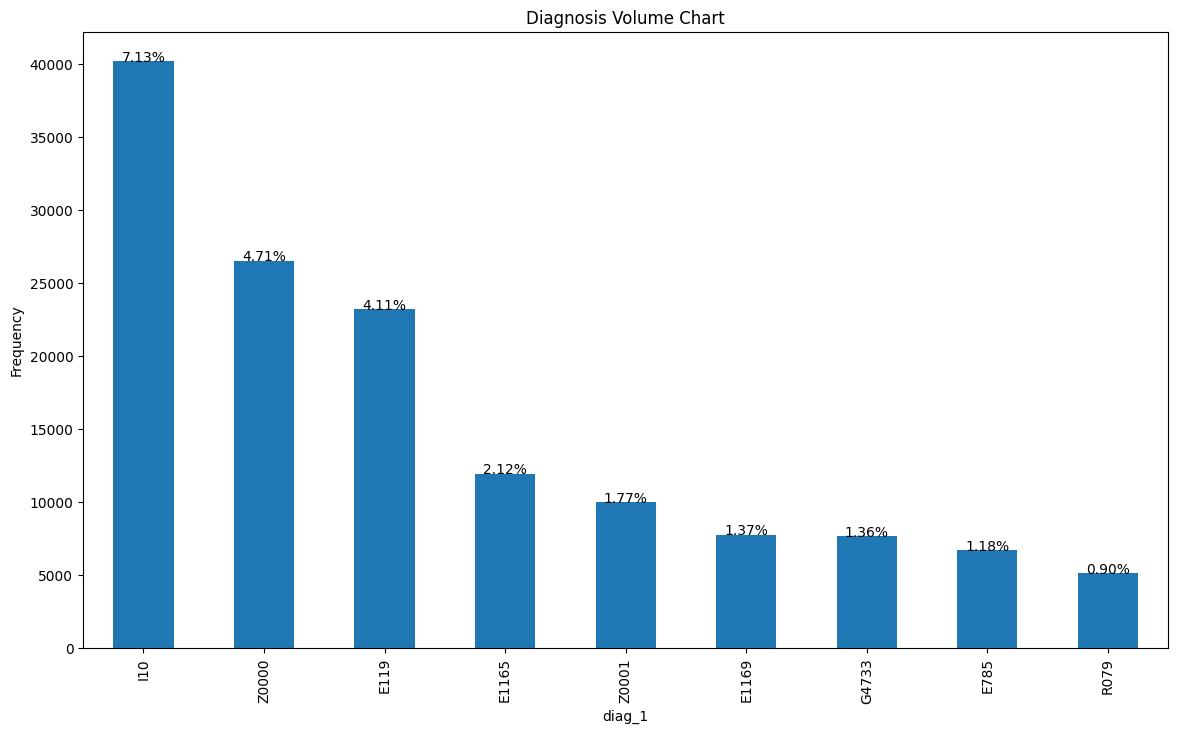

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the counts for each diagnosis
counts = medical_df['diag_1'].value_counts()
filtered_counts = counts[counts > 5000]

# Plot the counts
fig, ax = plt.subplots(figsize=(14, 8))
ax = filtered_counts.plot(kind='bar', title="Diagnosis Volume Chart", ax=ax)
ax.set_xlabel("diag_1")
ax.set_ylabel("Frequency")

# Calculate percentages and display on the bars
for i, val in enumerate(filtered_counts):
    ax.text(i, val + 0.5, f"{(val / len(medical_df)):.2%}", ha='center')

plt.show()


#### TOP 5 DIAGNOSIS CODES BY FREQUENCY IN OZEMPIC DATASET 
- N186: End stage renal disease
- Z5111 : antineoplastic chemotherapy
- R079 : Chest pain, unspecified
- M5416 : Radiculopathy, lumbar region
- E1165 : Type 2 diabetes mellitus with hyperglycemia

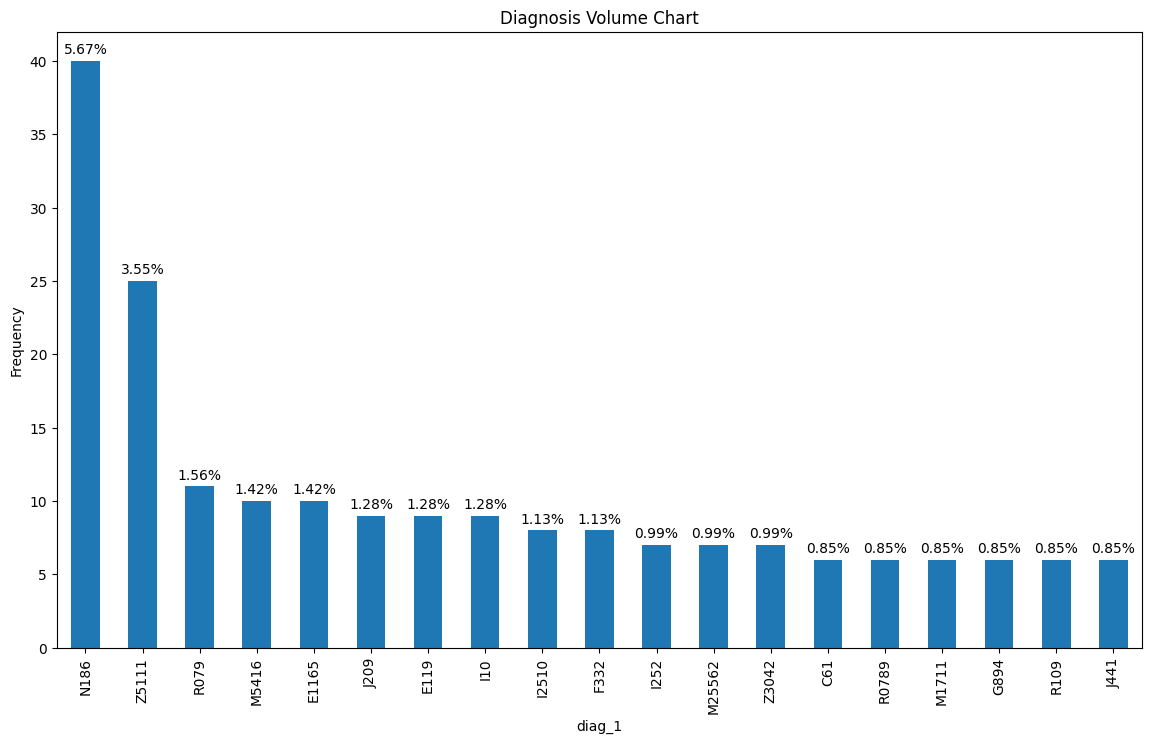

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the counts for each diagnosis
counts = ozempic_medical_df['diag_1'].value_counts()
filtered_counts = counts[counts > 5]

# Plot the counts
fig, ax = plt.subplots(figsize=(14, 8))
ax = filtered_counts.plot(kind='bar', title="Diagnosis Volume Chart", ax=ax)
ax.set_xlabel("diag_1")
ax.set_ylabel("Frequency")

# Calculate percentages and display on the bars
for i, val in enumerate(filtered_counts):
    ax.text(i, val + 0.5, f"{(val / len(ozempic_medical_df)):.2%}", ha='center')

plt.show()


In [41]:
## Dataset : contains billing information from January 2019 to september 2023
ozempic_medical_df['claim_date'] = pd.to_datetime(ozempic_medical_df['claim_date'])

# Extract max and min year-month
max_year_month = ozempic_medical_df['claim_date'].dt.to_period('M').max()
min_year_month = ozempic_medical_df['claim_date'].dt.to_period('M').min()

print("Max Year-Month:", max_year_month)
print("Min Year-Month:", min_year_month)

Max Year-Month: 2023-09
Min Year-Month: 2019-01


#### We see a gradual increase in usage of ozempic over the years. (2023 data is only uptil september, remaining 3 months data would definitely confirm the gradual increase in drug usage)

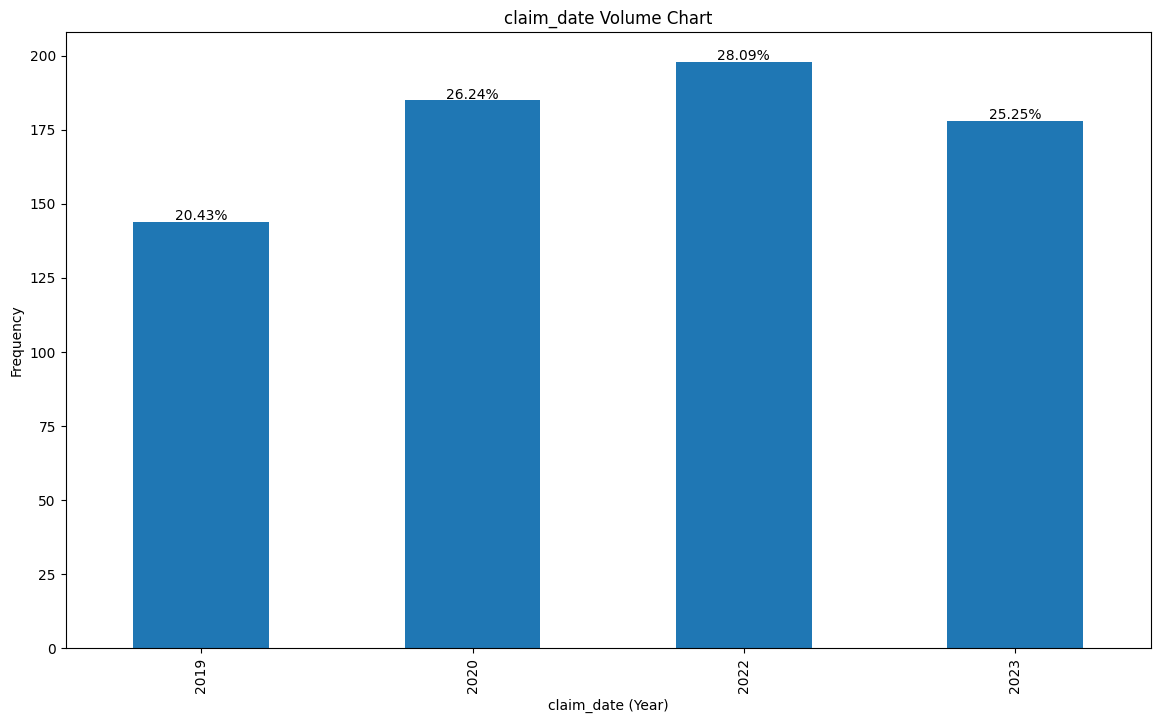

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert claim_date to datetime format
ozempic_medical_df['claim_date'] = pd.to_datetime(ozempic_medical_df['claim_date'])

# Get the counts for each year
counts = ozempic_medical_df['claim_date'].dt.year.value_counts().sort_index()

# Plot the counts
fig, ax = plt.subplots(figsize=(14, 8))
ax = counts.plot(kind='bar', title="claim_date Volume Chart", ax=ax)
ax.set_xlabel("claim_date (Year)")
ax.set_ylabel("Frequency")

# Calculate percentages and display on the bars
total_entries = len(ozempic_medical_df)
for i, val in enumerate(counts):
    ax.text(i, val + 0.5, f"{(val / total_entries):.2%}", ha='center')

plt.show()


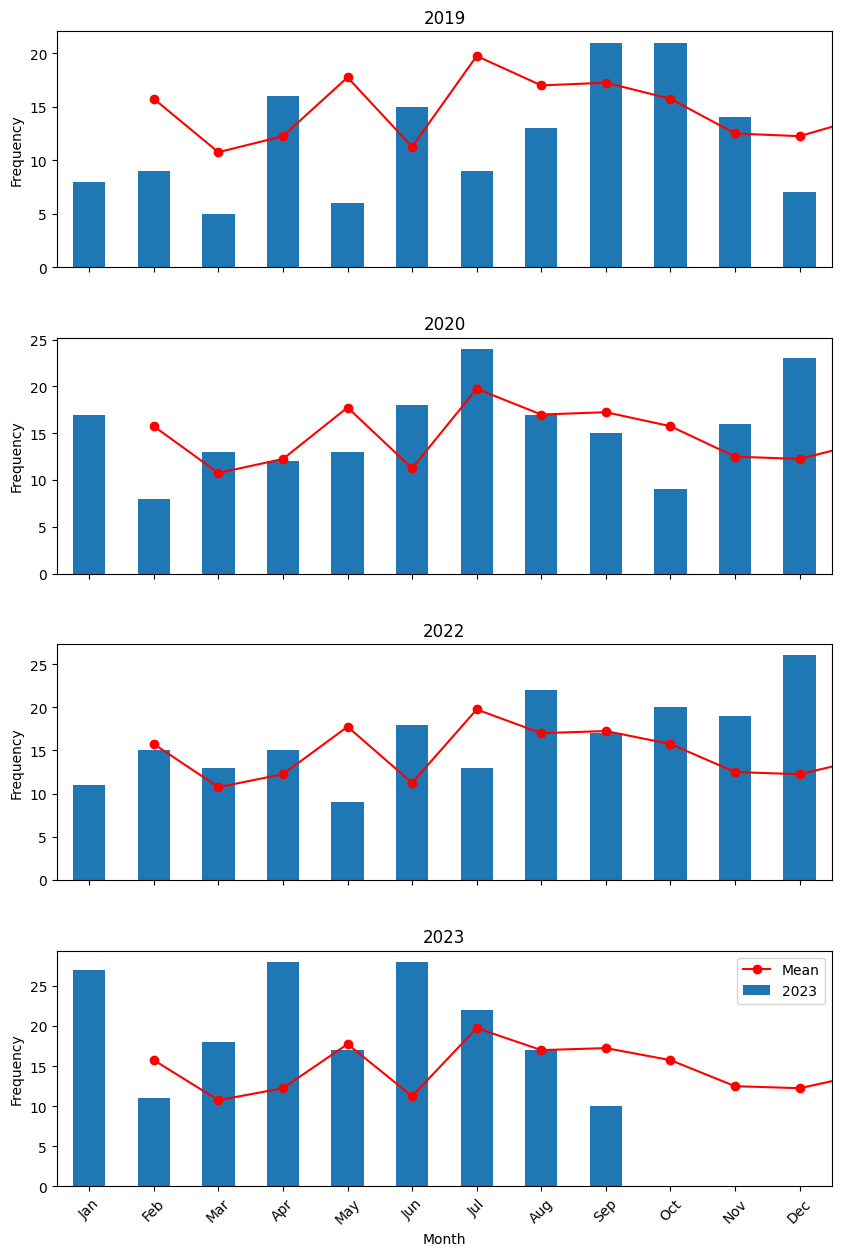

In [43]:
### No seasonal trends in the data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar

# Convert claim_date to datetime format
ozempic_medical_df['claim_date'] = pd.to_datetime(ozempic_medical_df['claim_date'])

# Extract the year from the claim_date and create a new column named 'year'
ozempic_medical_df['year'] = ozempic_medical_df['claim_date'].dt.year

# Group the data by 'year' and 'claim_date' to calculate frequency
monthly_counts = ozempic_medical_df.groupby(['year', ozempic_medical_df['claim_date'].dt.month.rename('month')]).size().unstack(fill_value=0)

# Plot month-wise frequency bar plots for each year
fig, axes = plt.subplots(len(monthly_counts), 1, figsize=(10, 15), sharex=True)
fig.subplots_adjust(hspace=0.3)

for i, (year, data) in enumerate(monthly_counts.iterrows(), start=0):
    ax = axes[i]
    data.plot(kind='bar', ax=ax, title=f"{year}", rot=0)
    ax.set_ylabel("Frequency")
    
    # Calculate the mean frequency across all years for each month
    monthly_mean = monthly_counts.mean()
    # Plot the trend line
    ax.plot(monthly_mean.index, monthly_mean.values, marker='o', linestyle='-', color='r', label='Mean')
    
    # Modify x-axis tick labels to use abbreviated month names
    ax.set_xticklabels([calendar.month_abbr[m] for m in data.index], rotation=45)

plt.xlabel("Month")
plt.legend(loc='upper right')
plt.show()



In [44]:
# data filtered for ozempic procedure does not hav any information on drug administration in the States - AE - Armed Forces Europe & AK - Alaska
patients_gender_cnt = ozempic_medical_df.groupby(['patient_state', 'patient_gender'])['journey_id'].nunique().reset_index(name = 'count')
total_cnt = patients_gender_cnt.groupby('patient_state')['count'].transform('sum')
patients_gender_cnt['gender_percentage'] = round((patients_gender_cnt['count']/total_cnt),4)*100
patients_gender_cnt


,patient_state,patient_gender,count,gender_percentage
0,AL,F,2,100.00
1,AZ,F,6,40.00
2,AZ,M,9,60.00
3,CA,F,251,57.44
4,CA,M,186,42.56


In [45]:
round((medical_df['patient_gender'].value_counts()/len(medical_df)*100),2)

patient_gender
F    58.95
M    41.02
Name: count, dtype: float64

In [46]:
round((ozempic_medical_df['patient_gender'].value_counts()/len(ozempic_medical_df)*100),2)

patient_gender
F    59.29
M    40.71
Name: count, dtype: float64

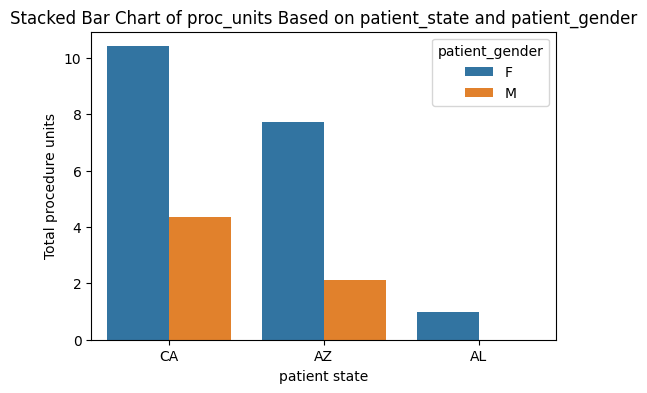

In [47]:
import seaborn as sns

# Create a stacked bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x='patient_state', y='proc_units', hue='patient_gender', data=ozempic_medical_df, estimator='mean', errorbar=None)

# Add labels and title
plt.xlabel('patient state')
plt.ylabel('Total procedure units')
plt.title('Stacked Bar Chart of proc_units Based on patient_state and patient_gender')

plt.show()


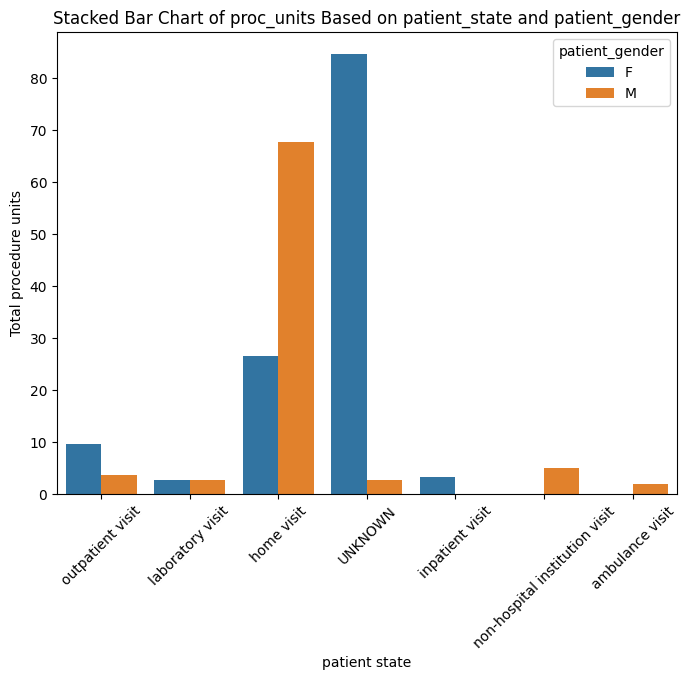

In [48]:
import seaborn as sns

# Create a stacked bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='visit_type', y='proc_units', hue='patient_gender', data=ozempic_medical_df, estimator='mean', errorbar=None)
plt.xticks(rotation=45)
# Add labels and title
plt.xlabel('patient state')
plt.ylabel('Total procedure units')
plt.title('Stacked Bar Chart of proc_units Based on patient_state and patient_gender')

plt.show()


In [49]:
count_units_gt_60 = ozempic_medical_df['proc_units'][ozempic_medical_df['proc_units'] > 10].count()
print("Number of records with proc_units > 60:", count_units_gt_60)

Number of records with proc_units > 60: 49


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


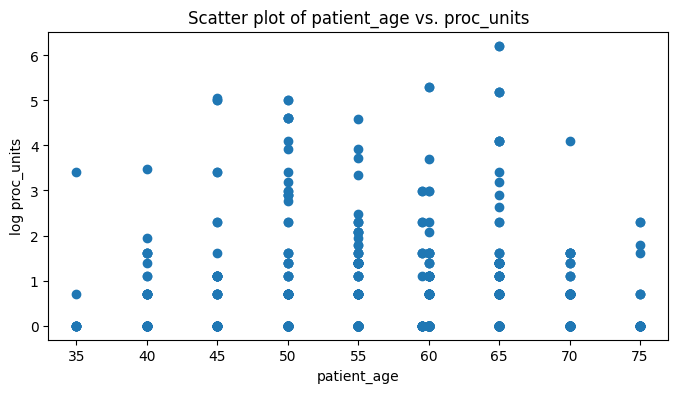

In [50]:
# Scatter plot for patient_age vs. patient_age
# 50 to 65 age patients are authorised higher doses of ozempic
# beacause of more number of patients between 50 to 65, it might seem as though this age bracket is getting higher doses, but this could be due to imbalance in the dataset

plt.figure(figsize=(8, 4))
plt.scatter(ozempic_medical_df['patient_age'], np.log(ozempic_medical_df['proc_units'])) # Applying log to standardise the results on x scale and get a better picture of the data
plt.title("Scatter plot of patient_age vs. proc_units")
plt.xlabel("patient_age")
plt.ylabel("log proc_units")
plt.show()

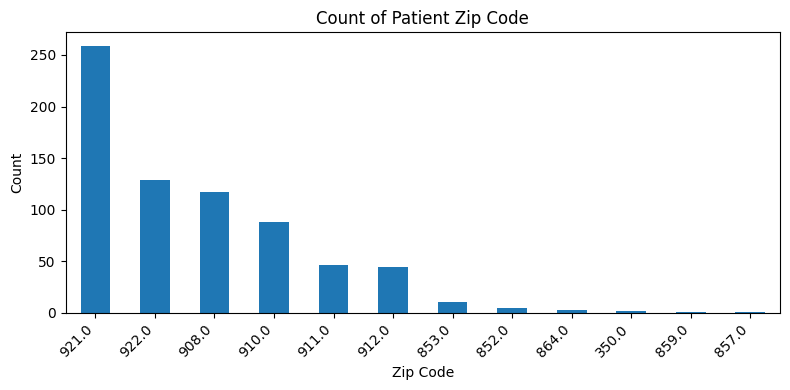

In [51]:
### Almost most of the patients treated with ozempic are from california (top 6 zip codes belong to california)
zip_count = ozempic_medical_df['patient_short_zip'].value_counts()

# Plotting
zip_count.plot(kind='bar', figsize=(8, 4))
plt.title('Count of Patient Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Correlation Matrix - all variables(X) with diagnosis (Y)
- Creating dummy variables for visit type ; return type is boolean(True , False), so unsing type cast to convert the result into int (1 , 0)

In [52]:
# One-hot encoding
ozempic_medical_df_encoded = pd.get_dummies(ozempic_medical_df, columns=['visit_type'], drop_first=True)

# converting the encoded variables to integer type, by default they are of bool type
ozempic_medical_df_encoded[['visit_type_ambulance visit', 'visit_type_home visit','visit_type_inpatient visit', 'visit_type_laboratory visit','visit_type_non-hospital institution visit',
       'visit_type_outpatient visit']] = ozempic_medical_df_encoded[['visit_type_ambulance visit', 'visit_type_home visit','visit_type_inpatient visit', 'visit_type_laboratory visit',
       'visit_type_non-hospital institution visit',
       'visit_type_outpatient visit']].astype(int)

ozempic_medical_df_encoded.head()
# ozempic_medical_df_encoded.columns

,journey_id,episode_id,visit_id,encounter_id,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,place_of_service,...,line_charge,claim_charge,smart_allowed,year,visit_type_ambulance visit,visit_type_home visit,visit_type_inpatient visit,visit_type_laboratory visit,visit_type_non-hospital institution visit,visit_type_outpatient visit
0,000450be3d71b0ec84e8e6edf40aadfa,d6f7433d88f652d21ec4785213d9d6d6,9834663a4e711e9a3d177f920af74f88109c3d1e7ebd90...,105f4acb7474e5566edcd206e4440c66904940b0663c0a...,2022-02-22,CA,921.0,65.0,F,UNKNOWN,...,7.2,7.2,343.99,2022,0,0,0,0,0,1
1,000f72e2fe46f4f45744f3a7f64894ce,5d98f1c8547ab6d9d011d0af82075dd1,2933e3a18ce67fcfdea4cf7325cb08a3c5b18838ff00cf...,4bc39aef0830e76dab96d91f0670cce3b6952bb656927d...,2023-06-02,CA,921.0,40.0,F,Office,...,5.0,5.0,343.99,2023,0,0,0,0,0,1
2,000f72e2fe46f4f45744f3a7f64894ce,5d98f1c8547ab6d9d011d0af82075dd1,4edb9cf9f5b7729d5a7e92da5c5a34cd98a5a65079c210...,009e00ca9a6481a7a00528ea05d02ec36665e6c18ac677...,2023-03-31,CA,921.0,40.0,F,Office,...,5.0,5.0,343.99,2023,0,0,0,0,0,1
3,000f72e2fe46f4f45744f3a7f64894ce,5d98f1c8547ab6d9d011d0af82075dd1,49958f367eaf1cc03f642ee5bc445c6ca3dc54978cb630...,254475ba0759ea013a6a699e5d55eb7de848bbd1671c94...,2023-06-16,CA,921.0,40.0,F,Office,...,30.0,30.0,343.99,2023,0,0,0,0,0,1
4,0012fd7f7c19414e99dd240c9b4b1952,14798cad0694a0353daef6c1184ebb21,d07de1c29e2805819a86841cf96760aaaad3aac48ea17c...,ec64f956755be1fcd4285a00cdaa62beb0fc657026bc38...,2022-11-02,CA,911.0,70.0,F,UNKNOWN,...,124.0,124.0,343.99,2022,0,0,0,0,0,1


In [53]:
# Automating the correlation matrix , requires the df to have just the continuous columns. 
# Filtering just for the numeric datatypes and storing them in a new df
continuous_columns = ozempic_medical_df.select_dtypes(include=['float64', 'int64']).columns
ozempic_medical_df_continuous = ozempic_medical_df[continuous_columns]
ozempic_medical_df_continuous=ozempic_medical_df_continuous.drop(columns=['proc_units'])

In [54]:
# Automating the correlation matrix , requires the df to have just the continuous columns. 
# Filtering just for the numeric datatypes and storing them in a new df
continuous_columns = ozempic_medical_df_encoded.select_dtypes(include=['float64', 'int64']).columns
ozempic_medical_df_continuous = ozempic_medical_df_encoded[continuous_columns]
ozempic_medical_df_continuous=ozempic_medical_df_continuous.drop(columns=['proc_units'])

Text(0.5, 1.0, 'Correlation w.r.t proc_units')

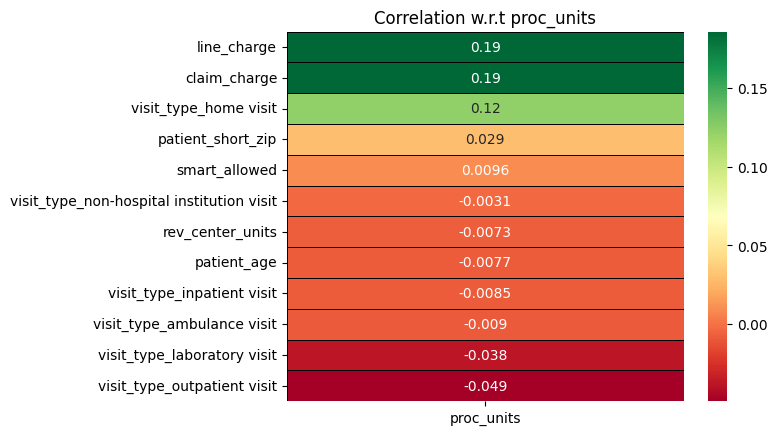

In [55]:
## Calculating & conditional formating the correlation between all the continuous variables of the dataset vs diagnosis
## There's no high correlation between the continuous/encoded variables & proc_units
corr = ozempic_medical_df_continuous.corrwith(ozempic_medical_df_encoded['proc_units']).sort_values(ascending = False).to_frame() 
corr.columns = ['proc_units']
sns.heatmap(corr,annot = True,cmap = 'RdYlGn',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t proc_units')


### Multicollinearity
- claim charge & line charge are having VIF = inf , which means that they have perfect mullticollinearity (Removed claim_charge)
- Patient age & zip code are having some collinearity (though it does not make sense theoretically, this could be due to small sample size)
- to avoid our models from getting effected by this relationship, I'm removing zip as we have other columns like state to represent the geographic location of the patient

In [56]:
# medical_df_int = medical_df.copy()
ozempic_medical_df_int = ozempic_medical_df_continuous # dropping the dependent variable to check for multicollinearity within the X(independent variables)

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = ozempic_medical_df_continuous.columns
vif_data["VIF"] = [variance_inflation_factor(ozempic_medical_df_continuous.values, i) for i in range(ozempic_medical_df_continuous.shape[1])]
print(vif_data)

                                     Variable        VIF
0                           patient_short_zip  84.401380
1                                 patient_age  38.583509
2                            rev_center_units   3.547527
3                                 line_charge        inf
4                                claim_charge        inf
5                               smart_allowed   1.964608
6                  visit_type_ambulance visit   1.132482
7                       visit_type_home visit   2.089828
8                  visit_type_inpatient visit   1.183962
9                 visit_type_laboratory visit   3.652651
10  visit_type_non-hospital institution visit   1.062642
11                visit_type_outpatient visit  38.673000


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [58]:
ozempic_medical_df_continuous = ozempic_medical_df_continuous.drop(columns=[ 'claim_charge','patient_short_zip']) 

#### **Causal Analysis**
1. Potential endogeneity issues in estimating the treatment effect of Ozempic on the target population.
- Endogeneity : The causal effects of an intervention or treatment on an outcome. It occurs when there is a correlation between the treatment (or the explanatory variables) and the error term in the regression model, violating the assumption of exogeneity
- Reverse Causality: Endogeneity can arise if the outcome variable (e.g., improvement in a medical condition) influences the treatment variable (Ozempic usage) instead of the other way around.
we might get it the wrong way around. For example, let's say we want to know if using a medicine called Ozempic helps improve a health condition. The problem is, if people who already have more severe symptoms are the ones more likely to use Ozempic, it might look like Ozempic is helping, but it's really just that the sickest people were more likely to use it in the first place. That could make it seem like Ozempic is working better than it really is.
- Selection Bias : people who decide to use a medicine might be different from those who don't use it. For example, maybe the ones who decide to use it are more motivated or have better access to healthcare. If these differences affect both whether someone decides to use the medicine and how well the medicine works, it could make the medicine seem more effective than it really is. This is because the people who are already more likely to improve their health could be the ones choosing to use the medicine in the first place.
- Time-Varying Confounders : things might change over time in a way that affects both whether someone uses a medicine and how well it works. For example, let's say people start making healthier lifestyle choices or using other medicines that also help with their health condition at the same time as starting Ozempic. It could make it hard to know if the improvement is really because of Ozempic or these other changes happening at the same time. This can make it tricky to figure out if Ozempic is really making a difference or if it's just because of the other changes people are making.
- Non-Compliance : when patients don't follow the instructions for how to take a medicine, it can make it hard to know if the medicine is really helping or not. For example, if someone is supposed to take Ozempic every day but they only take it once in a while, it can make it seem like Ozempic doesn't work as well as it really does. This is because the patient didn't follow the instructions, so it's not a fair test of how well the medicine works.

2. Addressing endogeneity
- **Randomized Controlled Trials (RCTs)**: This is considered the gold standard for estimating treatment effects as it eliminates most sources of endogeneity through random assignment of treatment. i.e helps ensure that the groups are generally comparable in all aspects except the treatment. Therefore, RCTs are less likely to have an unbalanced distribution of confounding variables, thus reducing the risk of Simpson's Paradox. (for experimental studies, we <u>cannot use RCT's as ours is an observational study</u>)

##### `Addressing Endogeneity in observational Studies` like our current problem statement

- **Identifying Confounders**
    - when there is a variable that causes both X and Y . In this scenario, Z induces an association between X and Y  even if X does not cause Y. The true effect of X on Y  will not be correctly estimated if we do not account for the effect of any and all confounders Z
    - If we are able to <u> identify and observe all confounders </u>, we should be able to remove their effects from the analysis and validly draw causal inferences.
    - regress all the X on treatment variable to control for confounders
    - Identify any <u> time trends </u>  in the data
    - Once we control for time & factor counfounders, we will be left with gamma hat, which implies the change in Y with change in treatment ∐ X


#### Double Lasso
- used to identify which covariates have sufficient empirical support for inclusion in analyses of experimental interventions.

Why not Lasso :
- lasso-estimated coefficients that are actually non-zero are typically underestimated
- lasso may mistakenly exclude variables with non-zero coefficients, particularly variables with moderate effects (omitted variable bias) which causes significant regularization bias that adversely affects estimation and inference about coefficients

#### **Model Development** Double-Lasso / Treatment Effect Lasso

In [59]:
#Make a new column OH which indicates whether someone was diagnosed with obesity or hypertension that day
diag_columns = [col for col in medical_df.columns if col.startswith('diag_')]

# Initialize column with 0
medical_df['OH'] = 0

# Looping through each diag column 
for col in diag_columns:
    # Assign value to 'OH' according to diag columns. 1 if any diag column starts with 'E66' or 'I10', otherwise 0
    medical_df['OH'] = np.where((medical_df[col].str.startswith('E66')) | (medical_df[col].str.startswith('I10')) | (medical_df['OH'] == 1), 1, 0)

In [60]:
#Make column d which indicates whether the patient was given ozempic
medical_df['d'] = np.where(medical_df['proc_code'] == 'J3490',1,0) #'J3490' is the proc_code for ozempic


##### As we can see in the correlation matrix, there aren't any significant correlation between the variables in the medical dataset (no presence of multicolinearity)

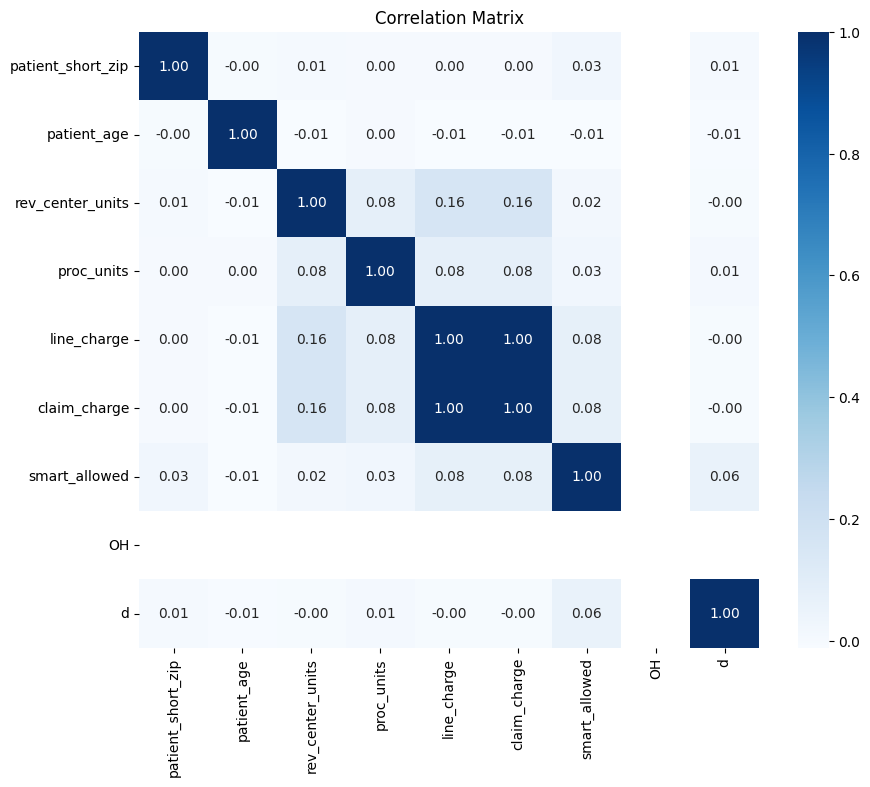

In [61]:
oh_df = medical_df[medical_df['OH'] == 1]
numeric_cols= oh_df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(10, 8))
sns.heatmap(oh_df[numeric_cols].corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [62]:
# Selecting theoretically relevant columns to develop a model 
columns_to_keep = ['journey_id','claim_date','patient_state', 'patient_short_zip', 'patient_age', 'patient_gender', 'visit_type','hcp_specialty','place_of_service','diag_1', 'diag_2', 'diag_3', 'diag_4',
       'diag_5','proc_code','OH','d']
df = medical_df[columns_to_keep]
df.head()

,journey_id,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,visit_type,hcp_specialty,place_of_service,diag_1,diag_2,diag_3,diag_4,diag_5,proc_code,OH,d
0,00006390c96ebfffed580074c35a16a7,2020-07-13,CA,922.0,55.0,M,home visit,UNKNOWN,Home,I872,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,A6549,0,0
2,00006390c96ebfffed580074c35a16a7,2023-07-19,CA,922.0,60.0,M,outpatient visit,Internal Medicine,Office,I5020,I480,I872,L03115,L03116,3074F,0,0
3,00006390c96ebfffed580074c35a16a7,2023-07-19,CA,922.0,60.0,M,outpatient visit,Internal Medicine,Office,I5020,I480,I872,L03115,L03116,3078F,0,0
4,00006d564a4718c744f1bbf1b6c5f8c3,2023-08-11,CA,900.0,55.0,F,laboratory visit,UNKNOWN,Independent Laboratory,N200,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,80053,0,0
5,00006d564a4718c744f1bbf1b6c5f8c3,2019-11-01,CA,900.0,50.0,F,outpatient visit,UNKNOWN,Office,I517,I77819,M5137,M4317,N200,72072,0,0


In [63]:
# #Drop rows with null values in the columns where null value percentage is low
# df = df.dropna(subset = ['proc_code'])
# df = df.dropna(subset = ['patient_age'])
# df = df.dropna(subset = ['patient_gender'])
# df = df.dropna(subset = ['patient_short_zip'])
# df = df.dropna(subset = ['visit_type'])

# #Add Unknown to where hcp_specialty and place_of_service are missing
# df['hcp_specialty'] = df['hcp_specialty'].astype(str).fillna('UNKNOWN')
# df['place_of_service'] = df['place_of_service'].astype(str).fillna('UNKNOWN')
# diag_2, diag_3, diag_4, diag_5 columns can have NULL values when diag_1 has values so, no need to treat these. I am not treating diag_1 here as I want to check this column after grouping on jouney_id

In [64]:
# Extract and store the obesity/hypertension diagnosis dates. 
# we will use this to check if a person who has been diagnosed and taken the medicine has been cured or been rediagnosed
df['OH_diagnosed_date'] = np.where(df['OH']==1,df['claim_date'],np.nan)
df['OH_not_diagnosed_date'] = np.where(df['OH']==0,df['claim_date'],np.nan)
df.head()

/var/folders/3_/cs0bsxl53jj55bb_mt8gmp040000gn/T/ipykernel_5927/3980752180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OH_diagnosed_date'] = np.where(df['OH']==1,df['claim_date'],np.nan)
/var/folders/3_/cs0bsxl53jj55bb_mt8gmp040000gn/T/ipykernel_5927/3980752180.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OH_not_diagnosed_date'] = np.where(df['OH']==0,df['claim_date'],np.nan)


,journey_id,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,visit_type,hcp_specialty,place_of_service,diag_1,diag_2,diag_3,diag_4,diag_5,proc_code,OH,d,OH_diagnosed_date,OH_not_diagnosed_date
0,00006390c96ebfffed580074c35a16a7,2020-07-13,CA,922.0,55.0,M,home visit,UNKNOWN,Home,I872,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,A6549,0,0,NaN,2020-07-13
2,00006390c96ebfffed580074c35a16a7,2023-07-19,CA,922.0,60.0,M,outpatient visit,Internal Medicine,Office,I5020,I480,I872,L03115,L03116,3074F,0,0,NaN,2023-07-19
3,00006390c96ebfffed580074c35a16a7,2023-07-19,CA,922.0,60.0,M,outpatient visit,Internal Medicine,Office,I5020,I480,I872,L03115,L03116,3078F,0,0,NaN,2023-07-19
4,00006d564a4718c744f1bbf1b6c5f8c3,2023-08-11,CA,900.0,55.0,F,laboratory visit,UNKNOWN,Independent Laboratory,N200,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,80053,0,0,NaN,2023-08-11
5,00006d564a4718c744f1bbf1b6c5f8c3,2019-11-01,CA,900.0,50.0,F,outpatient visit,UNKNOWN,Office,I517,I77819,M5137,M4317,N200,72072,0,0,NaN,2019-11-01


In [65]:
# Selecting all the relevant columns and aggregating the results at a patient - journey level
grouping_code = """
SELECT journey_id, patient_state, patient_short_zip, patient_age, patient_gender, visit_type, hcp_specialty, place_of_service
, max(OH) as OH
, max(d) as d
,min(OH_diagnosed_date) as earliest_OH_diagnosed_date
,max(OH_diagnosed_date) as latest_OH_diagnosed_date
,max(OH_not_diagnosed_date) as last_OH_not_diagnosed_date
FROM df
GROUP BY 1,2,3,4,5,6,7,8
"""
grouped_df = sqldf(grouping_code)


In [66]:
# Our main focus would be on patients who were diagnosed with obesity/hypertension and were between the range of 40 and 75 years of age 
filtered_df = grouped_df[(grouped_df['OH']==1)& (grouped_df['patient_age']>40) & (grouped_df['patient_age']<75)]


In [67]:
# Let's now create an outcome variable 'y' which flags whether the patient got treated successfully or not - 
#if the patient was diagnosed with obesity'hypertension at time t1 and was not diagnosed for obesity/hypertension later , then we can conclude that the patient was treated
# calculation = extract the 1st occurence of diagnosis & most recent diagnosis dates, then check if his recent diagnosed date is greater than the patient's 1st date (not cured)
# as if the patient has an occurence of diagnosis after his 1st treatment, it means that he is not cured when treated

filtered_df['y'] = np.where(filtered_df['latest_OH_diagnosed_date'] > filtered_df['earliest_OH_diagnosed_date'], 0, 1)


/var/folders/3_/cs0bsxl53jj55bb_mt8gmp040000gn/T/ipykernel_5927/546600410.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['y'] = np.where(filtered_df['latest_OH_diagnosed_date'] > filtered_df['earliest_OH_diagnosed_date'], 0, 1)


In [68]:
# Data Integrity Checks 
# Checked how many patients have a 2nd diagnosis of obesity & hypertension after their 1st journey of getting treated by ozempic 
# filtered_df['latest_OH_diagnosed_date'] != filtered_df['earliest_OH_diagnosed_date'] : (10138, 14)

# Then checked , if all these records are accurately marked as not cured (y==0) 
# so when we check the not cured condition with y==1 , it will return 0 records, which confirms that all the records are rightly tagged as not cured(y==0)
filtered_df[np.logical_and(filtered_df['latest_OH_diagnosed_date'] != filtered_df['earliest_OH_diagnosed_date'],filtered_df['y']==1)].shape

(0, 14)

In [70]:
from sklearn.preprocessing import LabelEncoder
##Perform one hot encoding on categorical variables
one_hot_df = pd.get_dummies(filtered_df, columns=['patient_gender'],drop_first=True,dtype=float)

# Columns to label encode
columns_to_encode = ['patient_state','patient_short_zip','patient_age','visit_type','hcp_specialty','place_of_service']
                                                       

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each column
for column in columns_to_encode:
    one_hot_df[column] = label_encoder.fit_transform(one_hot_df[column])

In [71]:
one_hot_df.head()

,journey_id,patient_state,patient_short_zip,patient_age,visit_type,hcp_specialty,place_of_service,OH,d,earliest_OH_diagnosed_date,latest_OH_diagnosed_date,last_OH_not_diagnosed_date,y,patient_gender_M
2,00006d564a4718c744f1bbf1b6c5f8c3,4,27,1,5,106,11,1,0,2019-11-01,2019-11-01,2022-10-07,1,0.0
3,00006d564a4718c744f1bbf1b6c5f8c3,4,27,1,7,23,16,1,0,2022-09-16,2022-09-16,None,1,0.0
7,00006d564a4718c744f1bbf1b6c5f8c3,4,27,1,7,82,23,1,0,2022-09-28,2022-09-28,None,1,0.0
12,000072bc05e31d0126475c7a3e771af1,4,33,2,7,43,16,1,0,2023-02-03,2023-02-03,None,1,1.0
14,00011020325337a2a22fb26b6492196a,4,34,6,5,106,11,1,0,2022-09-21,2022-09-21,2022-09-21,1,1.0


In [72]:
# Keep columns that are to be used in model
columns_to_drop = ['journey_id','OH','earliest_OH_diagnosed_date','last_OH_not_diagnosed_date','latest_OH_diagnosed_date']
filtered_df2 = one_hot_df.drop(columns = columns_to_drop)
# filtered_df2.head()

In [73]:
from sklearn.model_selection import train_test_split

#Split the data into testing and training data
train, test = train_test_split(filtered_df2, train_size=0.8, random_state=0)

In [74]:
#Pull x, d (treatment) and y(cured_status) separately
x_train= train.drop(['d','y'],axis=1)
x_test= test.drop(['d','y'],axis=1)
y_train= train['y']
y_test= test['y']
d_train= train['d']
d_test= test['d']

1st fit lasso with d ~ x (to get the effect X has on d, this will give us d which is independent of X)

In [75]:
#Find best alpha through cross-validation

from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=None, cv=5, random_state=0)

# Fit the model
lasso_cv.fit(x_train, d_train)

# Best alpha
print(f"Best alpha: {lasso_cv.alpha_}")

Best alpha: 0.00044143147243591796


In [76]:
from sklearn.linear_model import Lasso

#Fit lasso and predict treatment variable and store it in another variable 
lasso = Lasso(alpha=lasso_cv.alpha_)
lasso.fit(x_train, d_train)
d_train_pred = lasso.predict(x_train)
d_test_pred = lasso.predict(x_test)

In [77]:
print("Coefficients for first lasso:", lasso.coef_)

Coefficients for first lasso: [-0.          0.00045652 -0.00014374  0.00189149  0.00014442  0.00144672
 -0.        ]


Second lasso (partial) with y~d, predicted d, x

In [78]:
#Make new x which has d and predicted d as well
x_train2 = train.drop('y',axis=1)
x_train2['d_predicted'] = d_train_pred
x_test2 = test.drop('y',axis=1)
x_test2['d_predicted'] = d_test_pred

In [79]:
x_train2.head()

,patient_state,patient_short_zip,patient_age,visit_type,hcp_specialty,place_of_service,d,patient_gender_M,d_predicted
31126,4,32,2,4,19,12,0,0.0,-0.008848
2419,4,27,2,7,35,16,0,0.0,0.002641
92339,4,28,6,0,55,23,0,0.0,0.002298
60713,4,34,2,7,36,16,0,1.0,0.005982
83240,4,34,1,5,106,11,0,1.0,0.005218


In [80]:
x_train2.shape

(31732, 9)

In [81]:
#Function for partial lasso
import numpy as np
from scipy.optimize import minimize
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import log_loss

class SelectiveRegularizationLogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, penalty_indices, penalty_weights, tol=1e-4, max_iter=100):
        self.penalty_indices = penalty_indices
        self.penalty_weights = penalty_weights
        self.tol = tol
        self.max_iter = max_iter
    
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def _loss(self, coef, X, y):
        predictions = self._sigmoid(X @ coef)
        # Basic log loss
        basic_loss = log_loss(y, predictions)
        
        # Regularization term, selectively applied with L1 penalty
        reg_term = sum(self.penalty_weights[i] * abs(coef[self.penalty_indices[i]]) for i in range(len(self.penalty_indices)))
        
        return basic_loss + reg_term
    
    def fit(self, X, y):
        # Add intercept term
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        
        initial_coef = np.zeros(X.shape[1])
        result = minimize(self._loss, initial_coef, args=(X, y), method='SLSQP', tol=self.tol, options={'maxiter': self.max_iter})
        
        self.coef_ = result.x
        return self
    
    def predict_proba(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        proba = self._sigmoid(X @ self.coef_)
        return np.vstack([1-proba, proba]).T
    
    def predict(self, X):
        return (self.predict_proba(X)[:, 1] > 0.5).astype(int)

### **Interpretations**
- Running lasso CV to get the best lambda which balances the bias & variance
- best lambda from CV = 0.000637
- When a relatively small alpha value is selected by CV lasso,
- This means that the resulting Lasso regression model likely has a small number of predictors with non-zero coefficients, in this case all the predictors are non zero
- In the above case resulting Lasso regression model is similar to an ordinary linear regression model

In [82]:

lasso_cv = LassoCV(alphas=None, cv=5, random_state=0)

# Fit the model
lasso_cv.fit(x_train2, y_train)

# Best alpha
print(f"Best alpha: {lasso_cv.alpha_}")

Best alpha: 0.00010845464494500047


In [83]:
x_train2 = x_train2.values
y_train2 = y_train.values
x_test2 = x_test2.values
y_test2 = y_test.values

In [84]:
penalty_indices = [1,2,3,4,5,6,8] # Apply penalties to all coefficients except that of d and d_predicted
penalty_weights = [0.0014,0.0014,0.0014,0.0014,0.0014,0.0014,0.0014] # Penalty weights for these coefficients

model = SelectiveRegularizationLogisticRegression(penalty_indices=penalty_indices, penalty_weights=penalty_weights)
model.fit(x_train2, y_train)

SelectiveRegularizationLogisticRegression(penalty_indices=[1, 2, 3, 4, 5, 6, 8],
                                          penalty_weights=[0.0014, 0.0014,
                                                           0.0014, 0.0014,
                                                           0.0014, 0.0014,
                                                           0.0014])

In [85]:
print("Coefficients for penalized features:", model.coef_)

Coefficients for penalized features: [ 5.26020664e-03  1.23794142e-02  3.18924481e-02 -2.15103427e-02
 -6.06326685e-02  2.03663928e-03  2.31785313e-02 -1.67998439e-05
  6.40684925e-03 -3.23514934e-04]


#### **Model Evaluation and Interpretation**

- R^2 of -0.346 suggests that our model is performing poorly in terms of explaining the variance in cured status of the disease (obesity & hypertension)
- negative R^2 indicates that the model does not perform well in explaining the variance & may even perform worse than a model that simply predicts the mean of the Y
- Negative R^2 suggests that the model does not capture the underlying patterns in the data well and that the data has a high degree of variability that cannot be well-predicted by a linear model
- model is not the correct choice for this type of data

In [86]:
#Predict and evaluate model
from sklearn.metrics import mean_squared_error , r2_score

y_pred = model.predict(x_test2) # Predicting the cured status using the fitted model
mse = mean_squared_error(y_test2, y_pred)
rmse = np.sqrt(mse)
r2_score = r2_score(y_test2, y_pred)
print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2_score)

MSE: 0.2538762132862725
RMSE: 0.5038613036206219
R^2: -0.3402601790843045
